In [1]:
from Neuron_analysis_tool.Analyzer import Analyzer, long_pulse_protocol
from neuron import gui, h
import numpy as np
import os
import matplotlib.pyplot as plt


NEURON: unable to open font "*helvetica-medium-r-normal*--14*", using "fixed"


In [2]:

def Ca_spike_protocol(cell, start_seg=None):
    delay = 500.0
    stim = h.IClamp(0.5, sec=cell.soma[0])
    stim.dur = 5
    stim.delay = delay

    syn = h.epsp(cell.apic[36](0.9))
    syn.tau0 = 0.5
    syn.tau1 = 5
    syn.onset = stim.delay + 5
    syn.imax = 0.5
    stim.amp = 1.9
    
    stim2 = h.IClamp(0.5, sec=cell.soma[0])
    stim2.dur = 5
    stim2.delay = delay+200

    syn2 = h.epsp(cell.apic[36](0.9))
    syn2.tau0 = 0.5
    syn2.tau1 = 5
    syn2.onset = stim.delay+200 + 5
    syn2.imax = 0.5
    stim2.amp = 1.9

    h.tstop = 1000
    h.v_init = cell.soma[0].e_pas
    h.celsius = 37
    h.run()
    return 400, {}

def resting_protocol2(cell, start_seg=None):
    h.tstop = 50.0
    h.v_init = cell.soma[0].e_pas
    h.celsius = 37
    h.run()
    return 0, {}


In [3]:
analyser = Analyzer(type='L5PC')

In [4]:
record_dict, extra = analyser.record_protocol(protocol=Ca_spike_protocol, cut_start_ms=None, 
                                              record_name='v', compute_more_condunctances=True)

In [5]:
seg_to_indicate_dict={list(analyser.cell.dend[30])[-2]:dict(color='cyan', alpha=0.5, size=20, label='1'),
                     list(analyser.cell.apic[70])[-2]:dict(color='green', alpha=0.5, size=20, label='1')}

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


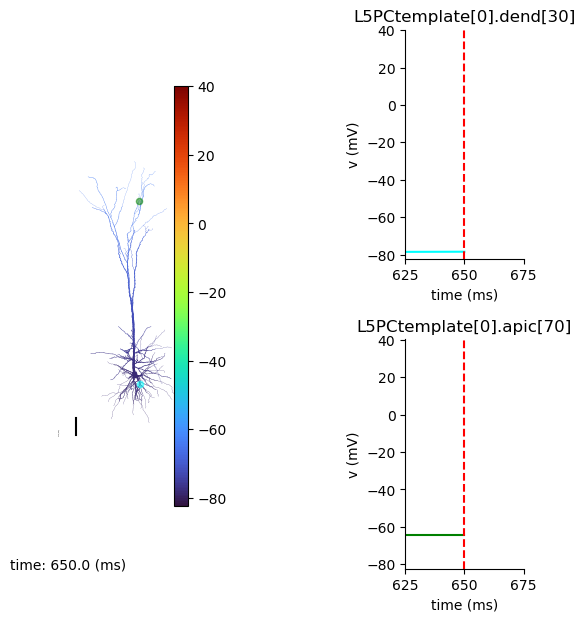

In [17]:
animation = analyser.create_movie_from_rec(records=record_dict, slow_down_factor=20, scale=0.25,
                                           func_for_missing_frames=np.max, theta=-90, diam_factor=0.5, 
                                           show_records_from=seg_to_indicate_dict, draw_funcs=extra['draw_funcs'],
                                           electrical=True, dancing=True, 
                                           more_conductances_=extra['more_conductances'], 
                                           figsize=(7,7),seg_to_indicate_dict=seg_to_indicate_dict)
animation.ipython_display(fps=10, loop=True, autoplay=True)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


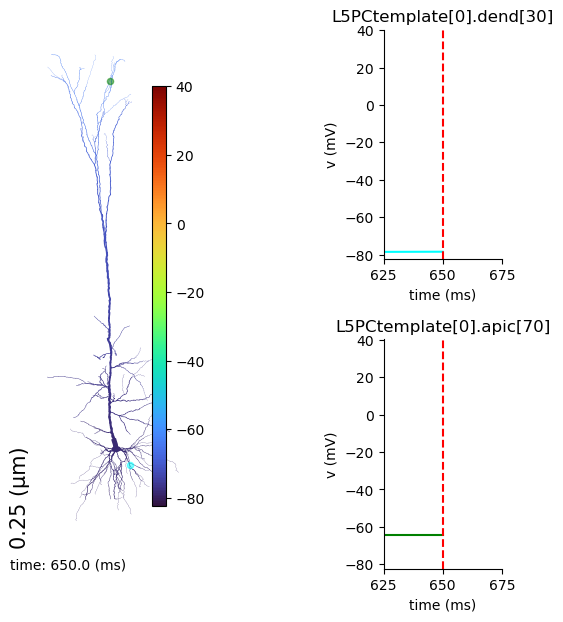

In [15]:
animation = analyser.create_movie_from_rec(records=record_dict, slow_down_factor=20, scale=0.25,
                                           func_for_missing_frames=np.max, theta=-90, diam_factor=0.5, 
                                           show_records_from=seg_to_indicate_dict, draw_funcs=extra['draw_funcs'],
                                           electrical=False, dancing=False, 
                                           more_conductances_=extra['more_conductances'], 
                                           figsize=(7,7),seg_to_indicate_dict=seg_to_indicate_dict)
animation.ipython_display(fps=10, loop=True, autoplay=True)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


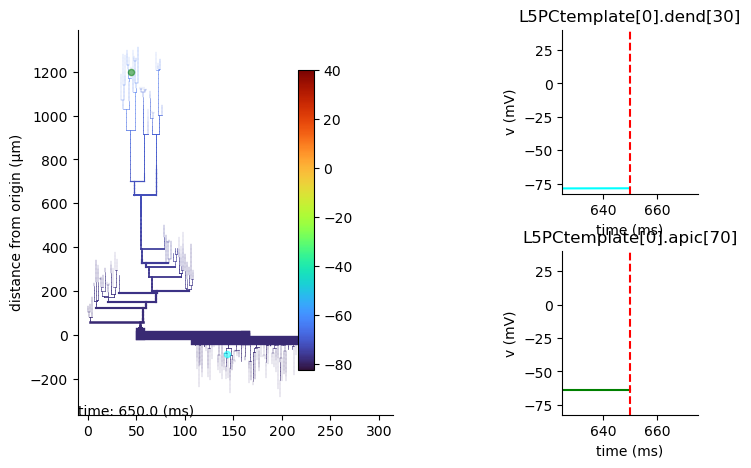

In [16]:
animation = analyser.create_movie_from_rec(records=record_dict, slow_down_factor=20, scale=0.25,
                                           func_for_missing_frames=np.max, theta=-90, diam_factor=0.5, 
                                           show_records_from=seg_to_indicate_dict, draw_funcs=extra['draw_funcs'],
                                           electrical=False, dancing=False, 
                                           more_conductances_=extra['more_conductances'], 
                                           figsize=(8,5),seg_to_indicate_dict=seg_to_indicate_dict,
                                           base_plot_type='dendogram')
animation.ipython_display(fps=10, loop=True, autoplay=True)

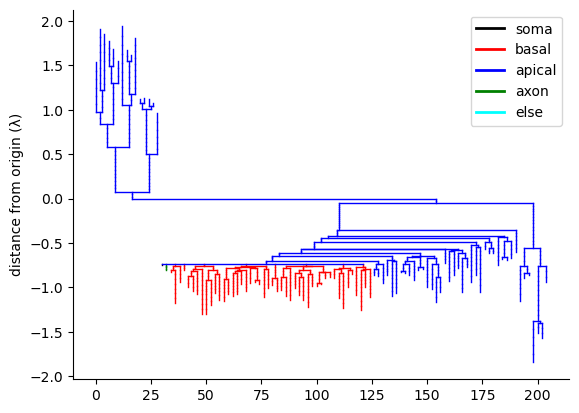

In [6]:
ax, x_pos, lines, segs = analyser.plot_dendogram(start_seg = list(analyser.cell.apic[50])[1], 
                                                              ax=None, 
                                                              segs_to_indecate = dict(), 
                                                              plot_legend=True, 
                                                              ignore_sections=[], 
                                                              electrical=True, 
                                                              diam_factor=None, 
                                                              distance=None, 
                                                              colors=None)
plt.savefig('temp1.pdf')

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


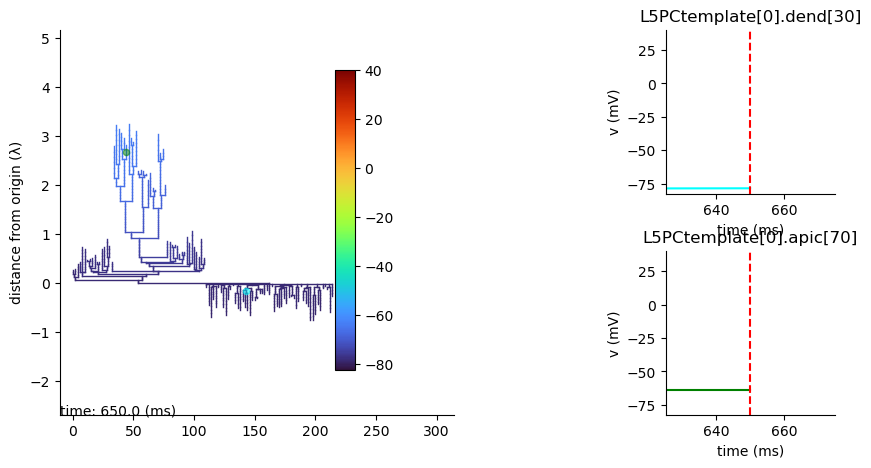

In [9]:


animation = analyser.create_movie_from_rec(records=record_dict, slow_down_factor=20, scale=0.25,
                                           func_for_missing_frames=np.max, theta=-90, diam_factor=None, 
                                           show_records_from=seg_to_indicate_dict, draw_funcs=extra['draw_funcs'],
                                           electrical=True, dancing=True, 
                                           more_conductances_=extra['more_conductances'],
                                          base_plot_type='dendogram',figsize=(10,5), 
                                           seg_to_indicate_dict=dict())
animation.ipython_display(fps=10, loop=True, autoplay=True)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


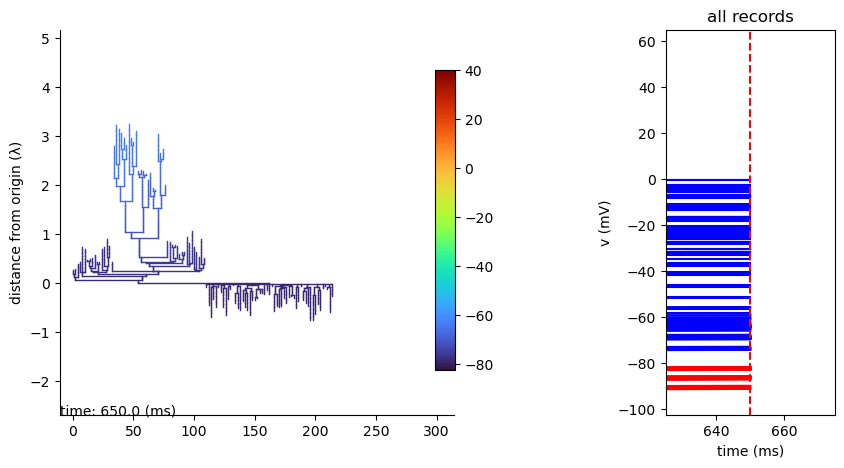

In [7]:
animation = analyser.create_movie_from_rec(records=record_dict, slow_down_factor=20, scale=0.25,
                                           func_for_missing_frames=np.max, theta=-90, diam_factor=None, 
                                           show_records_from=dict(), draw_funcs=extra['draw_funcs'],
                                           electrical=True, dancing=True, 
                                           more_conductances_=extra['more_conductances'],
                                          base_plot_type='dendogram',figsize=(10,5), 
                                           seg_to_indicate_dict=dict(),
                                           plot_all_records=True, distance_factor=20, plot_every=0.2
                                          )
animation.ipython_display(fps=10, loop=True, autoplay=True)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


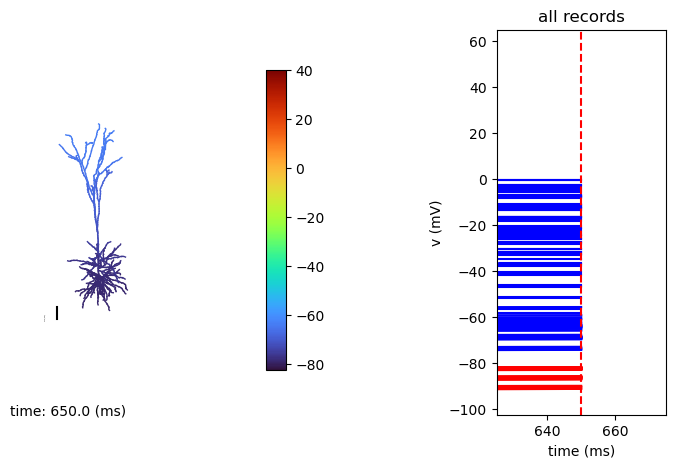

In [8]:
animation = analyser.create_movie_from_rec(records=record_dict, slow_down_factor=20, scale=0.25,
                                           func_for_missing_frames=np.max, theta=-90, diam_factor=None, 
                                           show_records_from=dict(), draw_funcs=extra['draw_funcs'],
                                           electrical=True, dancing=True, 
                                           more_conductances_=extra['more_conductances'],
                                          base_plot_type='morph',figsize=(10,5), 
                                           seg_to_indicate_dict=dict(),
                                           plot_all_records=True, distance_factor=20, plot_every=0.2
                                          )
animation.ipython_display(fps=10, loop=True, autoplay=True)